# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 30 de Septiembre, 2021 23:59
</div>

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [1]:
from sympy import *
from sympy import Sum, init_printing, Indexed

## Procedimiento

Para poder sacar la derivada de $\textbf{J}(\beta)$ describo la función con la variable _expr_.

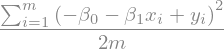

In [2]:
init_printing()

y, x, beta0, beta1, m, i = symbols('y x beta0 beta1 m i')
expr = 1/(2*m)*Sum((Indexed(y,i) - beta0 - beta1*Indexed(x,i))**2,(i, 1, m))

expr

La derivada con respecto a $ \beta_0 $ se expresa con la variable _deriv0_.

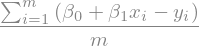

In [3]:
deriv0 = diff(expr,beta0)

simplify(deriv0)


La derivada con respecto a $ \beta_1 $ se expresa con la variable _deriv1_.

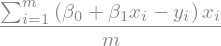

In [4]:
deriv1 = diff(expr,beta1)

simplify(deriv1)

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

In [5]:
# a) Graficar J(beta) en 3D y en una gráfica de contorno
# Lo primero por hacer es extraer los datos. 

with open('altura-Copy1.dat') as file:
    lineasAlt = file.readlines()

#Elimino los espacios y convierto la cadena de texto en número.

altura = []
for i in range(len(lineasAlt)):
    altura.append(float(lineasAlt[i]))
    
#Se hace el mismo procedimiento con la lista de edad.

with open('edad-Copy1.dat') as file:
    lineasEdad = file.readlines()
    
edad = []

for i in range(len(lineasEdad)):
    edad.append(float(lineasEdad[i]))

print(altura)   
print(edad)
    


[0.77918926, 0.91596757, 0.90538354, 0.90566138, 0.9389889, 0.9668474, 0.96436824, 0.91445939, 0.93933944, 0.96074971, 0.89837094, 0.91209739, 0.94238499, 0.96624578, 1.05265, 1.0143791, 0.95969426, 0.96853716, 1.0766065, 1.1454978, 1.0340625, 1.0070009, 0.96683648, 1.0895919, 1.0634462, 1.1237239, 1.0323374, 1.0874452, 1.0702988, 1.1606493, 1.0778037, 1.1069758, 1.0971875, 1.1648603, 1.1411796, 1.0844156, 1.1252493, 1.1168341, 1.1970789, 1.2069462, 1.1251046, 1.1235672, 1.2132829, 1.2522652, 1.2497065, 1.1799706, 1.1897299, 1.3029934, 1.2601134, 1.2562267]
[2.0658746, 2.3684087, 2.5399929, 2.5420804, 2.549079, 2.7866882, 2.9116825, 3.035627, 3.1146696, 3.1582389, 3.3275944, 3.3793165, 3.4122006, 3.4215823, 3.5315732, 3.6393002, 3.6732537, 3.9256462, 4.0498646, 4.2483348, 4.3440052, 4.3826531, 4.4230602, 4.6102443, 4.6881183, 4.9777333, 5.0359967, 5.0684536, 5.4161491, 5.4395623, 5.4563207, 5.5698458, 5.6015729, 5.6877617, 5.7215602, 5.8538914, 6.1978026, 6.3510941, 6.4797033, 6.738379

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [7]:
#Función de costos en lenguaje de Python
def J(b0,b1):
    costo = 0
    for i in range(len(edad)):
        costo += (altura[i] - b0 - b1*edad[i])**2/(2*len(edad))
    return costo

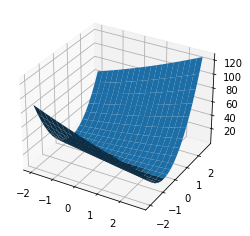

In [8]:
#La graficación 3D


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
b0 = np.arange(-2,3,0.25)
b1 = np.arange(-2,3,0.25)

B0, B1 = np.meshgrid(b0,b1)
C = J(B0,B1)

ax.plot_surface(B0,B1,C)

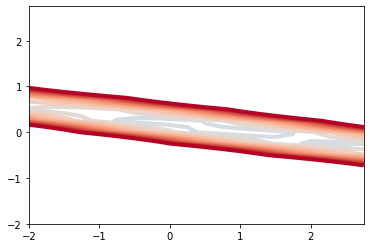

In [27]:
#Gráfica de contorno

levels = np.arange(-2, 3,0.25)
plt.contour(b0,b1,C,levels ,linewidths=4,cmap=cm.coolwarm);

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [10]:
%cat chirps-Copy1.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [44]:
#Para poder hacer la regresión lineal, colocamos los datos en una lista...

chirps1 = []
chirps2 = []
for line in open('chirps-Copy1.txt'):
    Lineas  = line
    LineasS = Lineas.split()
    chirps1.append(LineasS[0])
    chirps2.append(LineasS[1])

chirps1.pop(0)
chirps2.pop(0)

x = []
y = []

for i in range(len(chirps1)):
    x.append(float(chirps1[i]))
    y.append(float(chirps2[i]))
print(x, '\n', y)

[20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0, 14.4] 
 [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3]


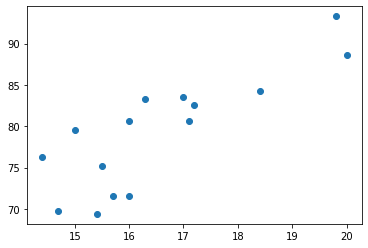

In [45]:
#Gráfica con los puntos
plt.scatter(x,y)

In [46]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets


class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m 

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Con la clase de **RegresionLineal** determino $\beta_0, \beta_1$ para el conjunto de datos de X_i, Y_i.

In [47]:
X_i = np.array(x)
Y_i = np.array(y)

r = RegresionLineal(alpha = 0.003, max_iters=10000, tols=0.00001)
r.gradientDescent(X_i,Y_i)

In [48]:
def plotModelo(x,y,rl,iteracion,Xax, Yax):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel(Xax)
    ax[0].set_ylabel(Yax)
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

Aquí queda graficada la regresión y la función de costos dadas $\beta_0, \beta_1$.

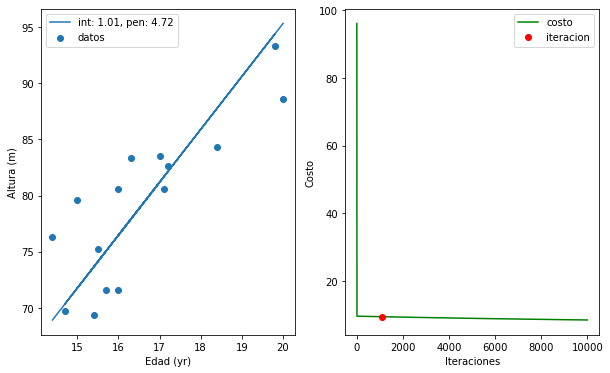

In [49]:
plotModelo(X_i,Y_i,r,1100,'Edad (yr)', 'Altura (m)')

La alfa con la que se calcuó la regresión es $ \alpha = 0.003 $. 

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

La función convergió con beta: [2.47231477 0.55235105] en la iteración 5240
La función convergió con beta: [2.49870062 0.55043075] en la iteración 5268
La función convergió con beta: [2.47476634 0.5519787 ] en la iteración 5243
La función convergió con beta: [ 8.70367963 -0.14002171] en la iteración 8740


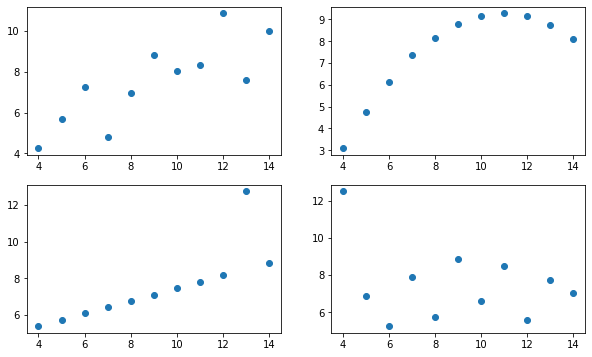

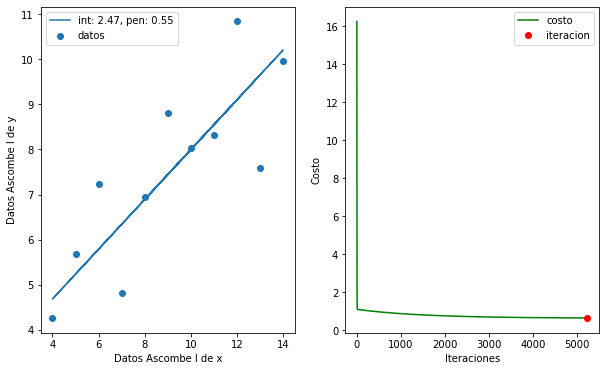

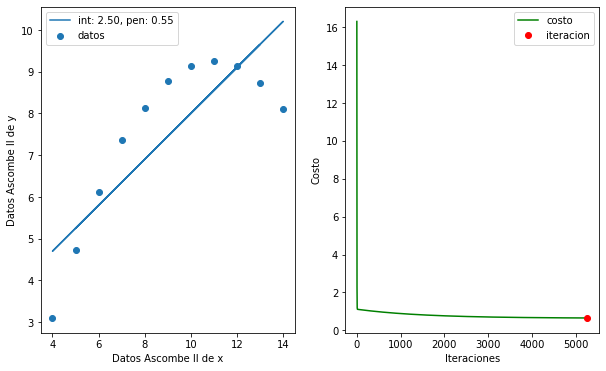

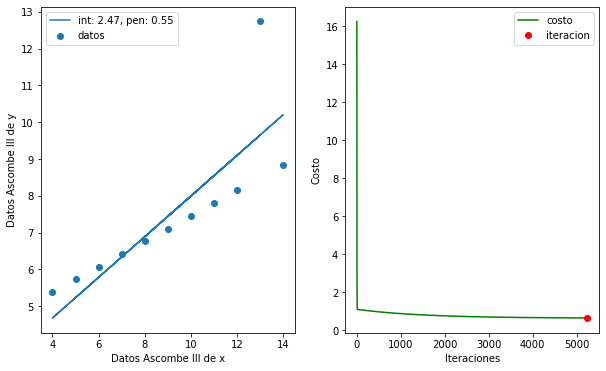

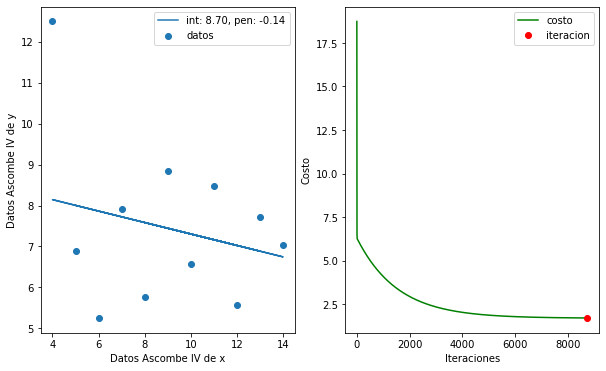

In [39]:
#Datos del cuarteto de Ascombe

x1 = np.array([10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0])
y1 = np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
y2 = np.array([9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.36,4.74])
y3 = np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

#Regresión lineal
r1 = RegresionLineal(alpha = 0.003, max_iters=10000, tols=0.00001)
r1.gradientDescent(x1,y1)

r2 = RegresionLineal(alpha = 0.003, max_iters=10000, tols=0.00001)
r2.gradientDescent(x1,y2)

r3 = RegresionLineal(alpha = 0.003, max_iters=10000, tols=0.00001)
r3.gradientDescent(x1,y3)

r4 = RegresionLineal(alpha = 0.003, max_iters=10000, tols=0.00001)
r4.gradientDescent(x1,y4)

#Las cuatro gráficas
    
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0,0].scatter(x1,y1)
#ax[0,0].plot(x1, modelo(x1,r1.beta[0],r1.beta[1])           
ax[0,1].scatter(x1,y2) 
ax[1,0].scatter(x1,y3) 
ax[1,1].scatter(x1,y4);

#Las cuatro regresiones

plotModelo(x1,y1,r1,5239,'Datos Ascombe I de x', 'Datos Ascombe I de y')
plotModelo(x1,y2,r2,5267,'Datos Ascombe II de x', 'Datos Ascombe II de y')
plotModelo(x1,y3,r3,5242,'Datos Ascombe III de x', 'Datos Ascombe III de y')
plotModelo(x1,y4,r4,8739,'Datos Ascombe IV de x', 'Datos Ascombe IV de y')

Lo que sucede al calcular la regresión lineal, es que los datos, a pesar de tener valores similares, resultan en distribuciones muy diferentes, por lo que la regresión lineal es distinta en cada caso. 

## Problema 5

Use el archivo `radioactive_decay.dat`

In [18]:
%cat radioactive_decay-Copy1.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

In [19]:
#Extracción de los datos

time = []
remai = []
t = []
R = []

for line in open('radioactive_decay-Copy1.txt'):
    Lineas = line
    Lineas1 = Lineas.split()
    time.append(Lineas1[0])
    remai.append(Lineas1[1])

time.pop(0)
remai.pop(0)

for i in range(len(time)):
    t.append(float(time[i]))
    R.append(float(remai[i]))

print(t, '\n',R)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0] 
 [10.48, 7.54, 5.49, 4.02, 2.74, 2.02, 1.5, 1.09, 0.68, 0.57, 0.37, 0.31, 0.19, 0.15, 0.13, 0.11]


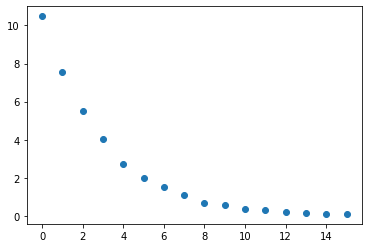

In [20]:
plt.scatter(t,R)

la forma que tomó la función es similar a una exponencial negativa.

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

Para linealizar los datos se puede utilizar el logaritmo.

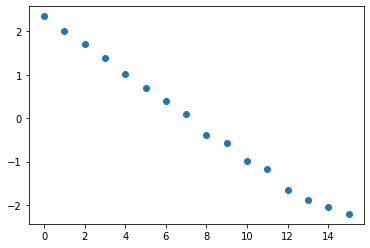

In [21]:
plt.scatter(t,np.log(R))

R1 = [np.log(i) for i in R]

In [22]:
#Creación del archivo. 

arr1 = np.array(t)
arr2 = np.array(R1)
arr = np.array([arr1,arr2]).T
np.savetxt('transform_radioactive_decay.txt', arr, fmt='%.2e', header="Time Remaining")

%cat transform_radioactive_decay.txt


# Time Remaining
0.00e+00 2.35e+00
1.00e+00 2.02e+00
2.00e+00 1.70e+00
3.00e+00 1.39e+00
4.00e+00 1.01e+00
5.00e+00 7.03e-01
6.00e+00 4.05e-01
7.00e+00 8.62e-02
8.00e+00 -3.86e-01
9.00e+00 -5.62e-01
1.00e+01 -9.94e-01
1.10e+01 -1.17e+00
1.20e+01 -1.66e+00
1.30e+01 -1.90e+00
1.40e+01 -2.04e+00
1.50e+01 -2.21e+00


**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

La función convergió con beta: [ 2.08518993 -0.29616224] en la iteración 2930


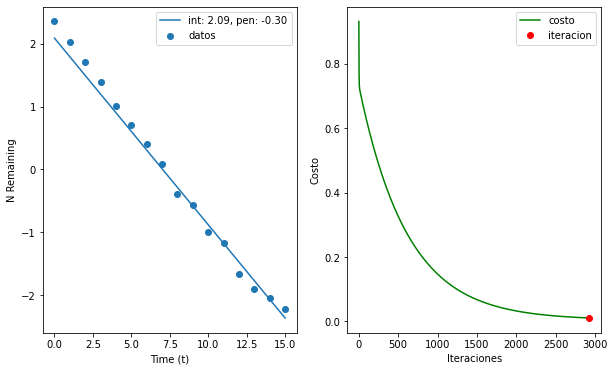

In [23]:
DataIn = np.loadtxt('transform_radioactive_decay.txt')

x_i = DataIn[:,0]
y_i = DataIn[:,1]

r = RegresionLineal(alpha = 0.003, max_iters=10000, tols=0.00001)
r.gradientDescent(x_i,y_i)
plotModelo(x_i,y_i,r,2929,'Time (t)', 'N Remaining')

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [24]:
Ytrans = lambda beta0, beta1, x: np.exp(beta0 + beta1*x)

In [25]:
Ypp = []
for i in range(len(t)):
    Ypp.append(Ytrans(r.beta[0], r.beta[1], i))

print(Ypp)
print(R)

[8.046119566201627, 5.983631704520068, 4.449828029617493, 3.309189213335396, 2.460934035375893, 1.830114851718412, 1.3609955904278097, 1.0121271872225346, 0.7526853505770679, 0.5597470793448417, 0.4162652994307212, 0.3095626683983069, 0.2302114680155532, 0.17120061756828397, 0.1273162093461897, 0.0946808334719798]
[10.48, 7.54, 5.49, 4.02, 2.74, 2.02, 1.5, 1.09, 0.68, 0.57, 0.37, 0.31, 0.19, 0.15, 0.13, 0.11]


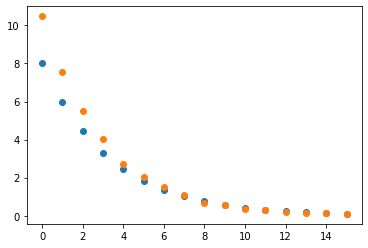

In [26]:
plt.scatter(t,Ypp);
plt.scatter(t,R);

Los valores de beta que mejor ajustan son:

$$
\beta_0 = 2.08518993
$$

$$
\beta_1 = -0.29616224
$$

En el espacio sin transformar no vale la pena nombrar betas, porque los puntos no son una transformación lineal, tienen en realidad un patrón exponencial. Es por ello que se transformaron los valores originales con el **logaritmo natural**. 